<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/TF2_0_LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Install TensorFlow
!pip install -q tensorflow-gpu==2.9.0
import tensorflow as tf
print(tf.__version__)

2.9.0


LSTM - Long short-term memory
GRU - Gated recurrent Unit
GRU is like a simplified version of the LSTM(less parameters and thus more efficent) 

z(t) = update gate vector # Should I tak the new value fot h(t), or should I keep the old value, h(t-1)?
r(t) = reset gate vector
h(t) hidden state

if z(t) = 1, then forget h(t-1

Vanishing gradient means the RNN forgets things in the past

CIRCLED DOT OPERATOR In the LSTM equations, the circled dot operator is typically used to represent element-wise multiplication.
An operator indicating special-defined operation that is similar to dot product.
es un tipo de producto punto pero que solo toma ciertos valores

No estamos guardando o descartando como tal, solo estamos asignando bajas o altas probabilidades dato x evento. si queremos olvidar, se restablece a 0

c(t) cell state (usually ignored) 

el valor r(t) es el d reinicio y va de 0 a 1 y en la ecuación se multiplica por el estado h(t-1)
 Things you should automatically know and have memorized
N = number of samples
T = sequence length
D = number of input features
M = number of hideen units 
K = number of output units


LSTM equations

f(t) = forget gate (Neuron) (binary classifier)
i(t) input/update gate Neuron) (binary classifier)
o(t) output gate Neuron) (binary classifier)
c(t) = cell gate // c(t) = f(t)*c(t-1) +i(t)*SimpleRNN
h(t) = hidden gate // h(t) = o(t)*tanh(c(t))

Simple RNN

i = Input(shape =(T,D))
x = SimpleRNN(M)(i)
x = Dense (K)(x)
model = Model(i, x )

LSTM

i = Input(shape =(T,D))
x = LSTM(M)(i)
x = Dense (K)(x)
model = Model(i, x )



i = Input(shape =(T,D))
x = LSTM(M, return_sequences=TRUE)(i) #N x T x M
x = Dense (K)(x)             #N x t x K

OPTIONS FOR RNN UNITS

o, h = SimpleRNN(M, return_state=TRUE)(i) #devuelve 2 cosas
"o" and "h" are the same thing - final state h(t)

o, h = GRU(M, return_state=TRUE)(i) #devuelve 2 cosas
"o" and "h" are the same thing - final state h(t)

o, h = GRU(M, return_state=TRUE)(i) #devuelve 2 cosas
"o" and "h" are the same thing - final state h(t), but we also get c(t)

In [53]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

x(t) = sin(wt^2)

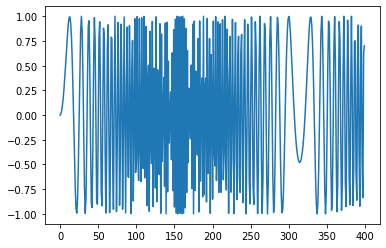

In [55]:
# plot it
plt.plot(series)
plt.show()

In [56]:
### build the dataset [
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T): 
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) #make it N x T
Y = np.array(Y)
N = len(X)
print("X:shape", X.shape, "Y.shape", Y.shape)

#N = number of samples
#T = sequence length
#D = number of input features
#M = number of hideen units 
#K = number of output units

X:shape (390, 10) Y.shape (390,)


In [57]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
)

#train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 22ms/step - loss: 1.4929 - val_loss: 0.9975
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 1.2057 - val_loss: 0.9209
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 1.0012 - val_loss: 0.8589
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 0.8457 - val_loss: 0.8069
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7312 - val_loss: 0.7612
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6581 - val_loss: 0.7278
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6072 - val_loss: 0.7032
Epoch 8/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5726 - val_loss: 0.6837
Epoch 9/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5469 - val_loss: 0.6677
Epoch 10/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5307 - val_loss: 0.6530
Epoch 11/80
7/7 [=====================

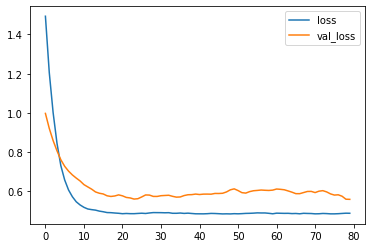

In [58]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

13/13 [==============================] - 0s 1ms/step
(390, 1)


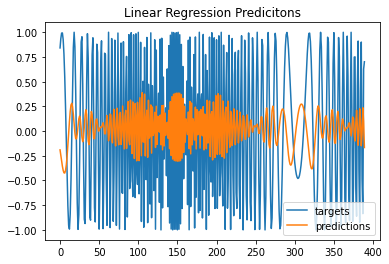

In [59]:
# One-setp forecast using true targets
#Note: even the one-step forecast fails badly

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predicitons")
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


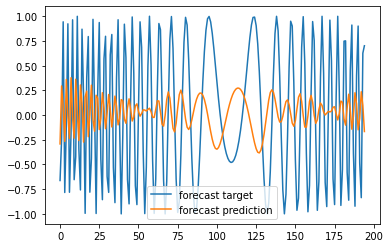

In [60]:
#this is the code we had before - it does the same thing
# one-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input []
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0] # array 1x1 -> escalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

1/1 [==============================] - 0s 19ms/step


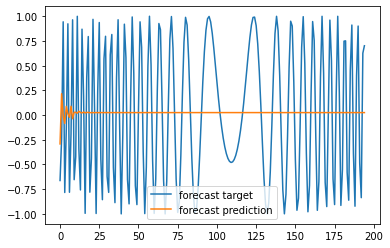

In [61]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train input 
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] #1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [62]:
### Now try RNN/LSTM model

X = X.reshape(-1,T,1) #make it N x t x D

# make the RNN

i = Input(shape=(T,D))
x = LSTM(10)(i) #podemos sustituir por x = SimpleRNN(10)(i) o x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.05),
)

#train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs = 200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 2s 81ms/step - loss: 0.5303 - val_loss: 0.5771
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5007 - val_loss: 0.5099
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4450 - val_loss: 0.4765
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3616 - val_loss: 0.4335
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3400 - val_loss: 0.5185
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3128 - val_loss: 0.3891
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2163 - val_loss: 0.3658
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1621 - val_loss: 0.2941
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1374 - val_loss: 0.2704
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1109 - val_loss: 0.2658
Epoch 11/200
7/7 [=

Cuando los datos no tengan ruido, se puede usar el modelo lineal pero cuando si tiene ruido, es mejor usar este modelo (RNN)

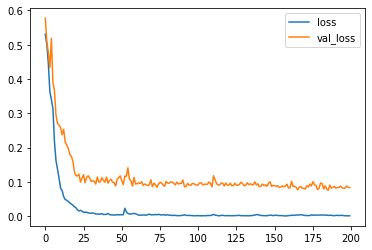

In [63]:
# plot same data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show() #Resultado descente

13/13 [==============================] - 0s 3ms/step
(390, 1)


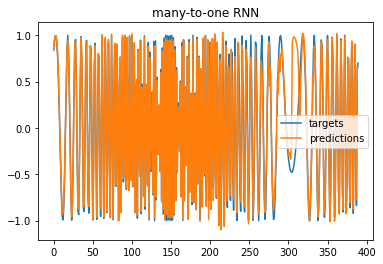

In [64]:
#One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions,label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


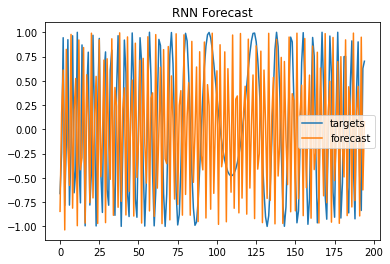

In [65]:
#Mutli-step forecast
forecast = []
input_ = X[-N//2] #como no tiene los ":" entonces significa que toma la primera mitad de los datos
while len(forecast) < len(Y[-N//2:]):
  #Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  #make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label = 'targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()